## Project Description

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart. In this project, we will develop a Reinforcement Learning (RL) agent. The trained agent makes the decision to push the cart to the left or right based on the cart position, velocity, and the pole angle, angular velocity.

### Action Space

The action is an *ndarray* with shape (1,) which can take values {0, 1} indicating pushing the cart to the left or right, respectively. Note that the velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it.

### State Space

We define *observation* as a state (they are used interchangeably here). The observation is an *ndarray* with shape (4,) with the values corresponding to the following positions and velocities:

| **Observation[n]** | **Observation**       | **Min**             | **Max**           |
| ------- | --------------------- | ------------------- | ----------------- |
| **0**   | Cart Position         | \-4.8               | 4.8               |
| **1**   | Cart Velocity         | \-Inf               | Inf               |
| **2**   | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| **3**   | Pole Angular Velocity | \-Inf               | Inf               |

## Conditions

The challenge is to balance the pole for **500 states per episode**. 

The pole is said to be balanced if:
* Pole Angle is at most ±12°
* Cart Position is at most ±2.4 (center of the cart reaches the edge of the display)

Violation to any of the above two conditions defines an unbalanced pole.

## Solution

We will be using a model-free Reinforcement Learning algorithm called **Proximal Policy Optimization (PPO)**. 

### Rationale

## Import Dependencies

In [1]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import torch

## Environment Testing

In [2]:
env_name = 'CartPole-v1'
env = gym.make(env_name)

## Model Training

Check if CUDA device is available.

In [3]:
torch.cuda.is_available()
print(torch.version.cuda)

11.7


In [4]:
env = gym.make(env_name)
env = DummyVecEnv([lambda: env])

model = PPO('MlpPolicy', env, verbose=1, device="cuda") # run this if you have an nVidia GPU installed
# model = PPO('MlpPolicy', env, verbose=1, device="auto")   # otherwise run this instead

Using cuda device


In [5]:
# total_timesteps is the number of env.steps(action) being run during training
model.learn(total_timesteps=20000, progress_bar=True)

Output()

-----------------------------
| time/              |      |
|    fps             | 328  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 2048 |
-----------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 327         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008398731 |
|    clip_fraction        | 0.1         |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.000718   |
|    learning_rate        | 0.0003      |
|    loss                 | 7.94        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0141     |
|    value_loss           | 54.7        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 325         |
|    iterations           | 3           |
|    time_elapsed         | 18          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.010425243 |
|    clip_fraction        | 0.092       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.666      |
|    explained_variance   | 0.0915      |
|    learning_rate        | 0.0003      |
|    loss                 | 10.7        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0216     |
|    value_loss           | 33.4        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 321         |
|    iterations           | 4           |
|    time_elapsed         | 25          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.009721671 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.632      |
|    explained_variance   | 0.284       |
|    learning_rate        | 0.0003      |
|    loss                 | 28.4        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0229     |
|    value_loss           | 47.8        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 316          |
|    iterations           | 5            |
|    time_elapsed         | 32           |
|    total_timesteps      | 10240        |
| train/                  |              |
|    approx_kl            | 0.0077522267 |
|    clip_fraction        | 0.0652       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.604       |
|    explained_variance   | 0.259        |
|    learning_rate        | 0.0003       |
|    loss                 | 29.9         |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.0153      |
|    value_loss           | 60.8         |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 315         |
|    iterations           | 6           |
|    time_elapsed         | 38          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.006795604 |
|    clip_fraction        | 0.0666      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.594      |
|    explained_variance   | 0.552       |
|    learning_rate        | 0.0003      |
|    loss                 | 22.6        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0134     |
|    value_loss           | 50.9        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 316         |
|    iterations           | 7           |
|    time_elapsed         | 45          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.012602527 |
|    clip_fraction        | 0.0887      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.571      |
|    explained_variance   | 0.613       |
|    learning_rate        | 0.0003      |
|    loss                 | 24.5        |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0126     |
|    value_loss           | 55.5        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 316         |
|    iterations           | 8           |
|    time_elapsed         | 51          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.011325415 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.566      |
|    explained_variance   | 0.698       |
|    learning_rate        | 0.0003      |
|    loss                 | 12.1        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0135     |
|    value_loss           | 48.8        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 316         |
|    iterations           | 9           |
|    time_elapsed         | 58          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.006810846 |
|    clip_fraction        | 0.0492      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.574      |
|    explained_variance   | 0.786       |
|    learning_rate        | 0.0003      |
|    loss                 | 13.9        |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.00992    |
|    value_loss           | 39.5        |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 314        |
|    iterations           | 10         |
|    time_elapsed         | 65         |
|    total_timesteps      | 20480      |
| train/                  |            |
|    approx_kl            | 0.00721616 |
|    clip_fraction        | 0.0874     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.584     |
|    explained_variance   | 0.931      |
|    learning_rate        | 0.0003     |
|    loss                 | 3.98       |
|    n_updates            | 90         |
|    policy_gradient_loss | -0.011     |
|    value_loss           | 17.6       |
----------------------------------------


In [6]:
sum_episode_scores = []

for episode in range(1, 100):    ## total 10 episodes
    score = 0                   ## reward init
    obs = env.reset()         ## observations
    done = False                ## episode completes will make done True

    for state in range(500):
        env.render()
        action, _ = model.predict(obs)
        n_state, reward, done, info = env.step(action)      ## apply action 
        if (abs(n_state[0][0]) > 2.4 or abs(n_state[0][2]) > 0.209):
            break

        score += reward        

    print('Episode:', episode, ';   Score:', score)
    sum_episode_scores.append(score)


print("Average score is ", sum(sum_episode_scores) / len(sum_episode_scores))

env.close()

Episode: 1 ;   Score: [500.]
Episode: 2 ;   Score: [500.]
Episode: 3 ;   Score: [121.]
Episode: 4 ;   Score: [500.]
Episode: 5 ;   Score: [500.]
Episode: 6 ;   Score: [500.]
Episode: 7 ;   Score: [175.]
Episode: 8 ;   Score: [500.]
Episode: 9 ;   Score: [500.]
Episode: 10 ;   Score: [500.]
Episode: 11 ;   Score: [500.]
Episode: 12 ;   Score: [255.]
Episode: 13 ;   Score: [500.]
Episode: 14 ;   Score: [500.]
Episode: 15 ;   Score: [180.]
Episode: 16 ;   Score: [500.]
Episode: 17 ;   Score: [478.]
Episode: 18 ;   Score: [295.]
Episode: 19 ;   Score: [500.]
Episode: 20 ;   Score: [500.]
Episode: 21 ;   Score: [500.]
Episode: 22 ;   Score: [443.]
Episode: 23 ;   Score: [500.]
Episode: 24 ;   Score: [500.]
Episode: 25 ;   Score: [500.]
Episode: 26 ;   Score: [500.]
Episode: 27 ;   Score: [500.]
Episode: 28 ;   Score: [306.]
Episode: 29 ;   Score: [500.]
Episode: 30 ;   Score: [500.]
Episode: 31 ;   Score: [500.]
Episode: 32 ;   Score: [500.]
Episode: 33 ;   Score: [163.]
Episode: 34 ;   Sco

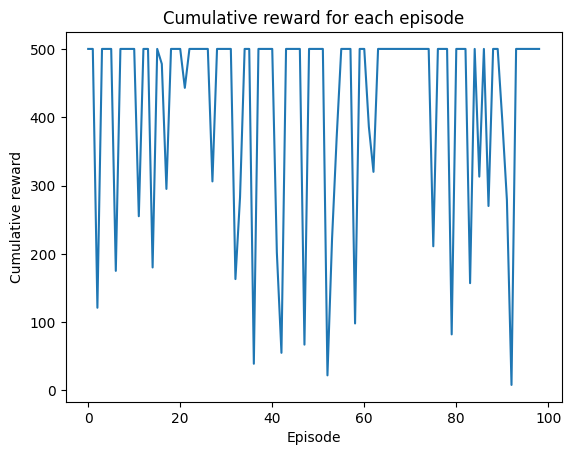

In [7]:
plt.plot(sum_episode_scores)
plt.title("Cumulative reward for each episode")
plt.ylabel("Cumulative reward")
plt.xlabel("Episode")
plt.show()